In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio
from scipy.sparse import csr_matrix

In [2]:
sourceFilesPrefix="ExpectedResults//one-"

rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")

In [3]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

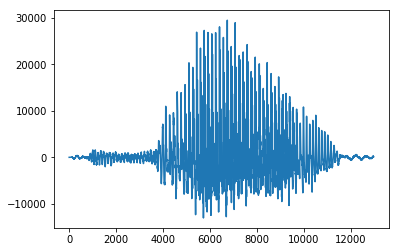

In [4]:
plt.figure()
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

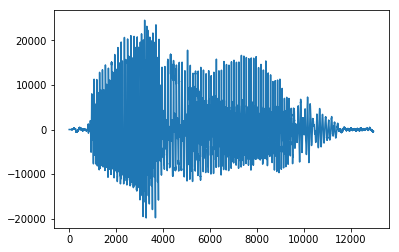

In [5]:
plt.figure()
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

In [6]:
med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
orig=np.matrix([s1data,s2data])

n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.51240893,0.51077126],
             [0.28167026,0.47883331]])
print("Mixing matrix: \n"+str(A))

X=np.dot(A,orig)


Mixing matrix: 
[[ 0.51240893  0.51077126]
 [ 0.28167026  0.47883331]]


In [7]:
print("Correlation coefficient - original data \n" + str(np.corrcoef(s1data,s2data)))
print(np.correlate(np.ravel(s1data),np.ravel(s2data)))
print("Correlation coefficient - mixed data \n" + str(np.corrcoef(X)))
print(np.correlate(np.ravel(X[0]),np.ravel(X[1])))

Correlation coefficient - original data 
[[ 1.         -0.01180854]
 [-0.01180854  1.        ]]
[-153.20309003]
Correlation coefficient - mixed data 
[[ 1.         0.9668584]
 [ 0.9668584  1.       ]]
[ 4986.01855687]


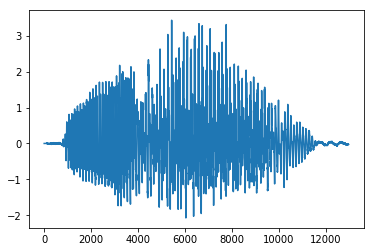

In [8]:
plt.figure()
plt.plot(X[0].T)
plt.show()

In [9]:
Audio(data=X[0], rate=16000)

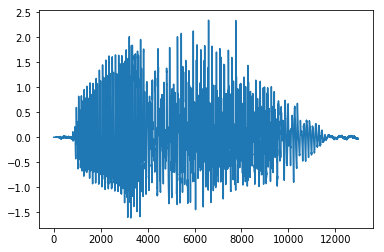

In [10]:
plt.figure()
plt.plot(X[1].T)
plt.show()

In [11]:
Audio(data=X[1], rate=16000)

In [12]:
def costFunc(Y,W):
    Z=sigmoid(Y)
    #print(np.dot(Z.T,Z).shape)
    #a=csr_matrix(Z.T)
    #b=csr_matrix(1-Z)
    #c2=np.linalg.det(W)
    #C2=np.log(c2)
    
    c1=np.dot((1-Z).T,Z)
    C1=np.log(c1)
    return np.sum(C1)

In [13]:
eta=0.01
eta0=eta
T=1000
corr=1
num_iter=8000
threshold=0.00000000001
cost=0
prevCost=0
flag=True
#abs(corr)>=5e-6 and
while flag==True:
    W=np.random.random([n,n])/10
    norms=np.array([])
    print("Initial guessed decomposition matrix: \n"+str(W))
    cost=0
    prevCost=0
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        norms=np.append(norms,np.linalg.norm(W))
        eta=eta0/(1+(i/T))
        if i==0:
            cost=costFunc(Y,W)
        elif i%100==0:
            prevCost=cost
            cost=costFunc(Y,W)
            #print(prevCost)
            #print(cost)
            if abs(abs(prevCost)-abs(cost)) < threshold:
                flag=False
                print("X"+str(i))
                break;
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)[1][0]
    print("Correlation coefficient \n" + str(np.corrcoef(Y2)[1][0]))
    print("\n\n")

Initial guessed decomposition matrix: 
[[ 0.050211    0.06528123]
 [ 0.02935421  0.04652124]]
X6700
Correlation coefficient 
-1.12755597737e-05





[[ 0.04358668 -0.03766597]
 [-0.0516956   0.07952671]]


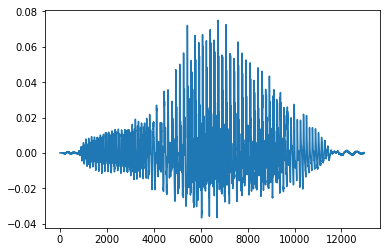

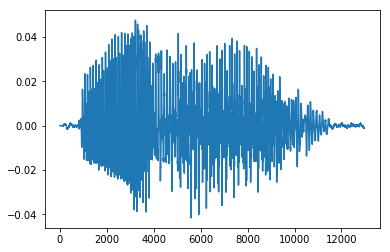

In [14]:
print(W)
Y2=np.dot(W,X)
plt.figure()
plt.plot(Y2[0].T)
plt.show()
plt.figure()
plt.plot(Y2[1].T)
plt.show()

In [15]:
Audio(data=Y2[0], rate=16000)

In [16]:
Audio(data=Y2[1], rate=16000)

In [17]:
# minimizare sau maximiare ?
# minimizare norma de W, dot(W.T, W)

#plotare functie de cost